# Chicago Crime Data Analysis (2001-2022) - Part 1

This notebook answers questions about crime trends in Chicago using the crime dataset (2001-2022).

---

## Table of Contents

1. [Setup & Data Loading](#setup)  
2. [Data Preparation](#preparation)  
3. [Topic 1: Comparing Police Districts (2022)](#topic1)  
4. [Topic 2: Crimes Across the Years](#topic2)  
5. [Topic 3: Comparing AM vs PM Rush Hour](#topic3)  
---

<a id='setup'></a>
## 1. Setup & Data Loading

In [21]:
# Mount Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import os

# Define path to your Data folder (update if necessary)
data_path = '/content/drive/MyDrive/Dataset/Data'

# List files in the Data folder
files = os.listdir(data_path)
print(f"Files in Data folder: {files[:5]} ...")

Files in Data folder: ['Chicago-Crime_2001.csv', 'Chicago-Crime_2002.csv', 'Chicago-Crime_2003.csv', 'Chicago-Crime_2004.csv', 'Chicago-Crime_2005.csv'] ...


In [23]:
# Load all CSV files and combine them into a single DataFrame
all_dataframes = []

for file in sorted(files):
    if file.endswith('.csv'):
        file_path = os.path.join(data_path, file)
        df = pd.read_csv(file_path)
        all_dataframes.append(df)

crime_df = pd.concat(all_dataframes, ignore_index=True)

print(f"Combined dataset shape: {crime_df.shape}")

Combined dataset shape: (7713109, 12)


<a id='preparation'></a>
## 2. Data Preparation

- Convert the 'Date' column to datetime format  
- Drop missing dates  
- Sort and set Date as index for time series analysis

In [24]:
# Convert 'Date' to datetime
crime_df['Date'] = pd.to_datetime(crime_df['Date'], errors='coerce')

# Drop rows with invalid dates
crime_df = crime_df.dropna(subset=['Date'])

# Sort by Date
crime_df = crime_df.sort_values('Date')

# Set Date as index
crime_df.set_index('Date', inplace=True)

print("Data prepared. Here's a quick look:")
crime_df.head()

Data prepared. Here's a quick look:


,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
2001-01-01,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137
2001-01-01,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707
2001-01-01,2280620,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782
2001-01-01,9755214,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN


<a id='topic1'></a>
## 3. Topic 1: Comparing Police Districts (2022)

Which district had the most and least crimes in 2022?

In [25]:
# Filter for 2022 data
crimes_2022 = crime_df[crime_df.index.year == 2022]

# Count crimes by District
district_counts = crimes_2022['District'].value_counts()

most_crime_district = district_counts.idxmax()
least_crime_district = district_counts.idxmin()

print(f"Most crimes in 2022: District {most_crime_district} with {district_counts[most_crime_district]} crimes.")
print(f"Least crimes in 2022: District {least_crime_district} with {district_counts[least_crime_district]} crimes.")

Most crimes in 2022: District 8.0 with 14805 crimes.
Least crimes in 2022: District 31.0 with 15 crimes.


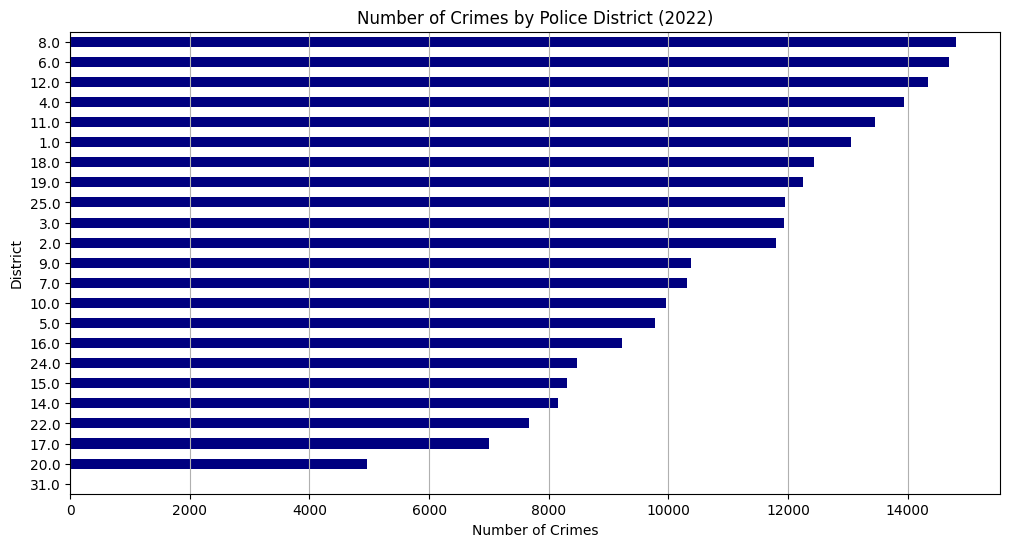

In [26]:
# Visualize crime counts by district in 2022
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
district_counts.sort_values().plot(kind='barh', color='navy')
plt.title('Number of Crimes by Police District (2022)')
plt.xlabel('Number of Crimes')
plt.ylabel('District')
plt.grid(axis='x')
plt.show()

<a id='topic2'></a>
## 4. Topic 2: Crimes Across the Years

- Total crime trend from 2001 to 2022  
- Check trends of top 10 individual crime types  

/tmp/ipython-input-496651033.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_crimes = crime_df.resample('Y').size()


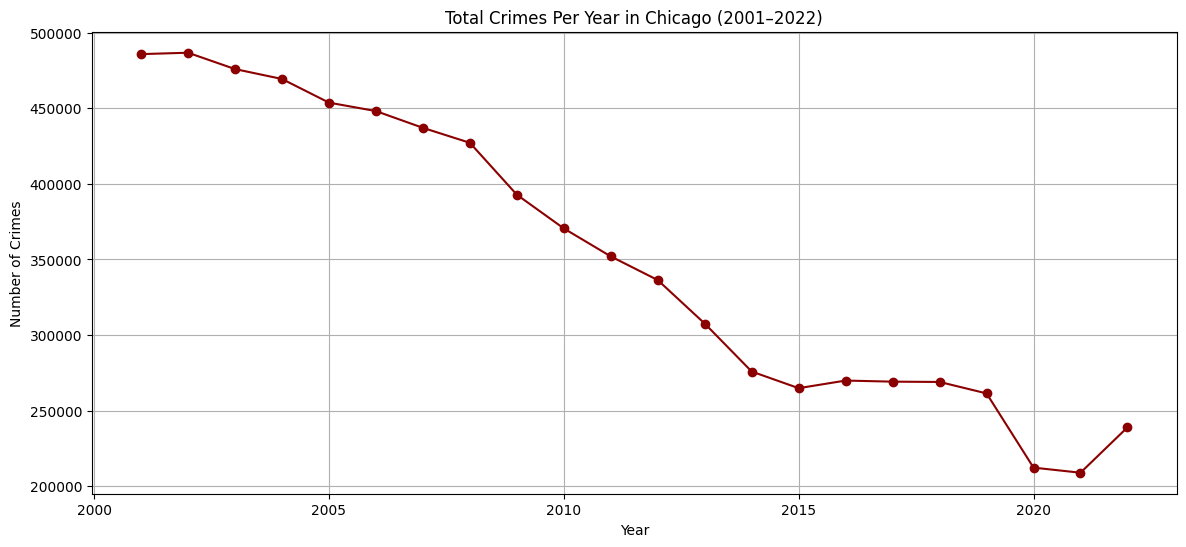

In [27]:
# Total crimes per year
annual_crimes = crime_df.resample('Y').size()

plt.figure(figsize=(14,6))
plt.plot(annual_crimes.index.year, annual_crimes.values, marker='o', color='darkred')
plt.title("Total Crimes Per Year in Chicago (2001–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()

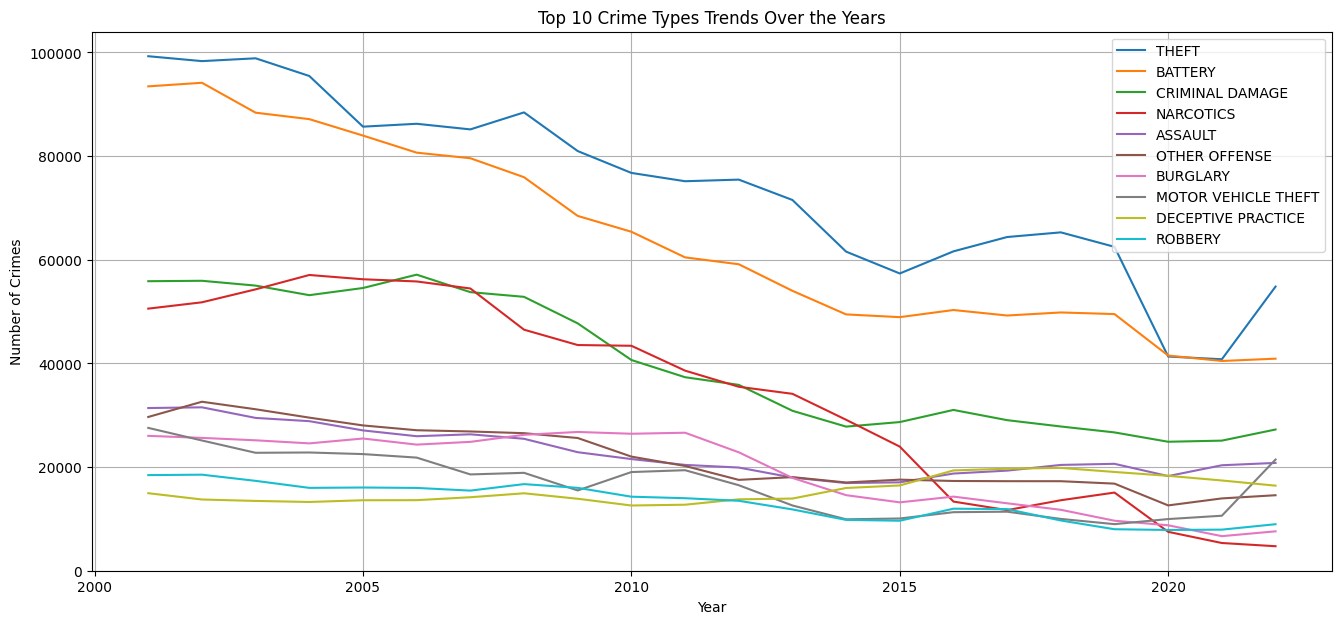

In [28]:
# Top 10 most frequent crime types
top_types = crime_df['Primary Type'].value_counts().head(10).index

# Yearly counts for top crimes
crime_type_trends = crime_df.groupby([crime_df.index.year, 'Primary Type']).size().unstack(fill_value=0)

plt.figure(figsize=(16,7))
for crime_type in top_types:
    plt.plot(crime_type_trends.index, crime_type_trends[crime_type], label=crime_type)

plt.title('Top 10 Crime Types Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.show()

<a id='topic3'></a>
## 5. Topic 3: Comparing AM vs PM Rush Hour

- Are crimes more common during AM (7AM-10AM) or PM (4PM-7PM) rush hours?  
- What are the top 5 crimes in each rush hour?  
- Are Motor Vehicle Thefts more common in AM or PM rush hours?

In [29]:
# Extract hour from datetime index
crime_df['Hour'] = crime_df.index.hour

# Define AM and PM rush hours
am_rush = crime_df[(crime_df['Hour'] >= 7) & (crime_df['Hour'] < 10)]
pm_rush = crime_df[(crime_df['Hour'] >= 16) & (crime_df['Hour'] < 19)]

print(f"Total crimes during AM rush hour (7-10AM): {len(am_rush)}")
print(f"Total crimes during PM rush hour (4-7PM): {len(pm_rush)}")

Total crimes during AM rush hour (7-10AM): 770651
Total crimes during PM rush hour (4-7PM): 1206353


In [30]:
# Top 5 crimes during AM rush hour
print("Top 5 crimes during AM rush hour:")
print(am_rush['Primary Type'].value_counts().head(5))

Top 5 crimes during AM rush hour:
Primary Type
THEFT              185239
BATTERY            108199
CRIMINAL DAMAGE     81281
BURGLARY            73999
OTHER OFFENSE       62453
Name: count, dtype: int64


In [31]:
# Top 5 crimes during PM rush hour
print("Top 5 crimes during PM rush hour:")
print(pm_rush['Primary Type'].value_counts().head(5))

Top 5 crimes during PM rush hour:
Primary Type
THEFT              293514
BATTERY            213002
CRIMINAL DAMAGE    134101
NARCOTICS          103032
ASSAULT             89600
Name: count, dtype: int64


In [32]:
# Motor Vehicle Thefts AM vs PM
am_mvt_count = am_rush[am_rush['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
pm_mvt_count = pm_rush[pm_rush['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]

print(f"Motor Vehicle Thefts during AM rush hour: {am_mvt_count}")
print(f"Motor Vehicle Thefts during PM rush hour: {pm_mvt_count}")

Motor Vehicle Thefts during AM rush hour: 41578
Motor Vehicle Thefts during PM rush hour: 53716


# Conclusion

## Interpretation and Conclusions:

1. Crime Distribution by Police District (2022):
   - District 8 recorded the highest number of crimes in 2022 with 14,805 incidents.
   - District 31 had the lowest crime rate with only 15 crimes.
   - This shows a significant variation in crime levels across different police districts.
2. Total Crimes Per Year in Chicago (2001–2022):
   - There has been a clear declining trend in the total number of crimes over the years from about 480,000 in 2001 to around 240,000 in 2022.
   - This indicates an overall improvement in public safety or effectiveness of crime prevention measures.
   - However, there are some fluctuations around 2015-2019 and a slight increase again around 2022.
3. Top 10 Crime Types Trends Over the Years:
   - Theft and Battery are consistently the two most common crime types, though both have shown a general decline.
   - Narcotics, Criminal Damage, and Assault show declining trends but with some variations.
   - Some crime types like Deceptive Practice have remained relatively steady.
   - Robbery and Motor Vehicle Theft have shown reductions over time.
4. Rush Hour Crime Patterns:
   - There are significantly more crimes during PM rush hours (4-7 PM) compared to AM rush hours (7-10 AM).
   - Theft and Battery top the list during both rush hours, with thefts nearly doubling in the PM rush hour compared to AM.
   - Motor Vehicle Thefts are higher in the PM rush hour as well.

## Overall Insights:

- Crime in Chicago has been decreasing steadily over the past two decades, indicating progress in law enforcement and possibly socio-economic improvements.
- Crime is not evenly distributed geographically, with certain districts like District 8 facing much higher crime rates.
- Rush hour crime data suggests more vigilance is needed during late afternoons and early evenings.
- Theft and battery remain the most prevalent issues, requiring focused preventive strategies.

# Chicago Crime Data Analysis (2001-2022) - Part 2

Goal: Forecast two crime types (Theft, Assault) for the next 6 months and help law enforcement allocate resources.

---

## Table of Contents

1. [Step 1: Select 2 Crime Types](#Step1)  
2. [Step 2: Prepare Monthly Time Series](#Step2)  
3. [Step 3: Handle Null Values](#Step3)  
4. [Step 4: Decompose Time Series](#Step4)  
5. [Step 5: Differencing (Stationarity Check)](#Step5)
6. [Step 6: Plot ACF and PACF](#Step6)
7. [Step 7: Train/Test Split](#Step7)
8. [Step 8: Manual ARIMA/SARIMA Model](#Step8)
9. [Step 9: Forecast and Compare](#Step9)
10. [Step 10: Use auto_arima for Tuning](#Step10)
11. [Step 11: Forecast with Tuned Model](#Step11)
12. [Step 12: Choose the Final Model](#Step12)
13. [Step 13: Forecast Beyond the Data](#Step13)
14. [Step 14: Final Questions](#Step14)

---

<a id='Step1'></a>
## 1. Select 2 Crime Types

In [33]:
selected_crimes = ['Theft', 'Assault']

We choose two crimes to analyze and forecast:

- Theft

- Assault

<a id='Step2'></a>
## 2. Prepare Monthly Time Series

In [34]:
# Create Year-Month column from the index
crime_df['YearMonth'] = crime_df.index.to_period('M')

# Filter for chosen crimes
crime_types = ['THEFT', 'ASSAULT'] # Crime types should be capitalized as in the dataframe
df_filtered = crime_df[crime_df['Primary Type'].isin(crime_types)].copy()

# Group and count crimes per month and type
monthly_counts = df_filtered.groupby(['YearMonth', 'Primary Type']).size().unstack(fill_value=0)

# Set index as datetime
monthly_counts.index = monthly_counts.index.to_timestamp()

monthly_counts.head()

Primary Type,ASSAULT,THEFT
YearMonth,,
2001-01-01,2123,7867
2001-02-01,2029,6669
2001-03-01,2824,7766
2001-04-01,2746,7702
2001-05-01,2903,8420


<a id='Step3'></a>
## 3. Handle Null Values

In [35]:
print(monthly_counts.isnull().sum())
monthly_counts = monthly_counts.fillna(0)

Primary Type
ASSAULT    0
THEFT      0
dtype: int64


<a id='Step4'></a>
## 4. Decompose Time Series

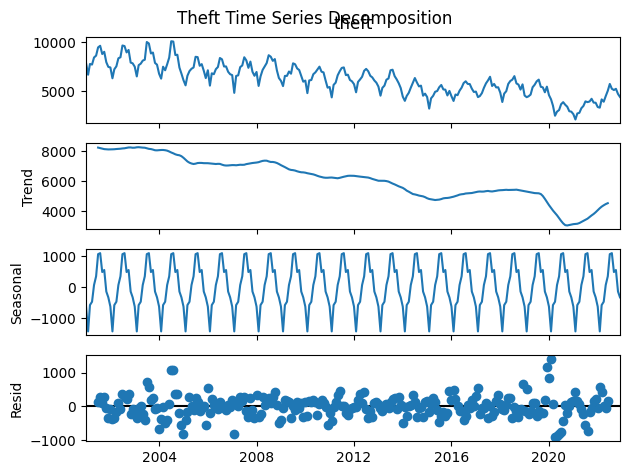

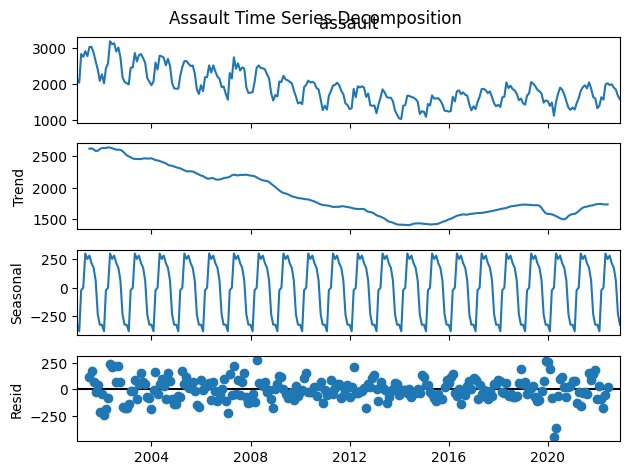

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Rename columns to lowercase for easier access
monthly_counts.columns = monthly_counts.columns.str.lower()

# Theft decomposition
decomp_theft = seasonal_decompose(monthly_counts['theft'], model='additive', period=12)
decomp_theft.plot()
plt.suptitle("Theft Time Series Decomposition")
plt.show()

# Assault decomposition
decomp_assault = seasonal_decompose(monthly_counts['assault'], model='additive', period=12)
decomp_assault.plot()
plt.suptitle("Assault Time Series Decomposition")
plt.show()

<a id='Step5'></a>
## 5. Differencing (Stationarity Check)

In [37]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    if result[1] < 0.05:
        print("=> Series is stationary")
    else:
        print("=> Series is non-stationary")

# Test Theft
print("Theft ADF Test:")
adf_test(monthly_counts['theft'])

# Test Assault
print("\nAssault ADF Test:")
adf_test(monthly_counts['assault'])

# Differencing if needed (example Theft)
theft_diff = monthly_counts['theft'].diff().dropna()
print("\nTheft Differenced ADF Test:")
adf_test(theft_diff)

Theft ADF Test:
ADF Statistic: -1.393935415992172
p-value: 0.5851800781286368
Critical Value 1%: -3.456780859712
Critical Value 5%: -2.8731715065600003
Critical Value 10%: -2.572968544
=> Series is non-stationary

Assault ADF Test:
ADF Statistic: -1.8366236043801119
p-value: 0.3624365777528107
Critical Value 1%: -3.4569962781990573
Critical Value 5%: -2.8732659015936024
Critical Value 10%: -2.573018897632674
=> Series is non-stationary

Theft Differenced ADF Test:
ADF Statistic: -3.953728130820586
p-value: 0.0016731573192928163
Critical Value 1%: -3.456780859712
Critical Value 5%: -2.8731715065600003
Critical Value 10%: -2.572968544
=> Series is stationary


<a id='Step6'></a>
## 6. Plot ACF and PACF

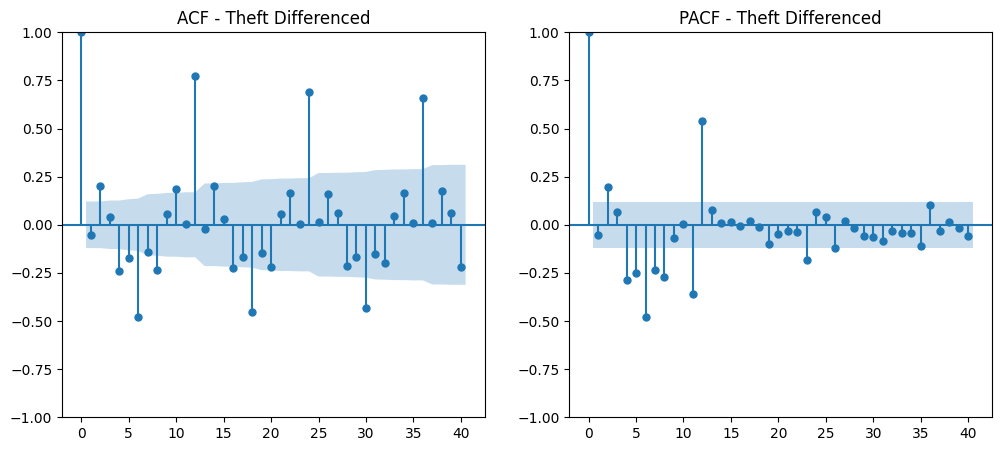

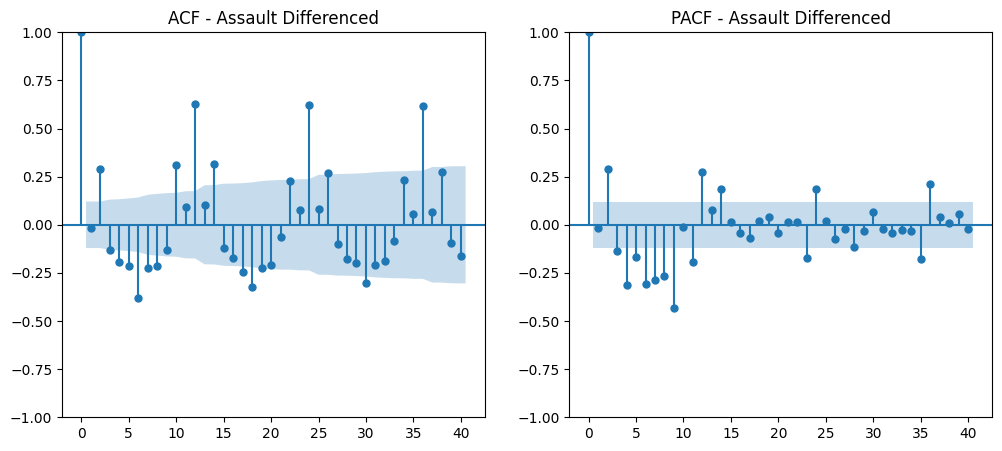

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for differenced Theft
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(theft_diff, lags=40, ax=plt.gca())
plt.title('ACF - Theft Differenced')

plt.subplot(122)
plot_pacf(theft_diff, lags=40, ax=plt.gca())
plt.title('PACF - Theft Differenced')

plt.show()

# Repeat for Assault differenced series
assault_diff = monthly_counts['assault'].diff().dropna()

plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(assault_diff, lags=40, ax=plt.gca())
plt.title('ACF - Assault Differenced')

plt.subplot(122)
plot_pacf(assault_diff, lags=40, ax=plt.gca())
plt.title('PACF - Assault Differenced')

plt.show()

<a id='Step7'></a>
## 7. Train/Test Split

In [39]:
test_size = 6

# Theft
theft_train = monthly_counts['theft'][:-test_size]
theft_test = monthly_counts['theft'][-test_size:]

# Assault
assault_train = monthly_counts['assault'][:-test_size]
assault_test = monthly_counts['assault'][-test_size:]

<a id='Step8'></a>
## 8. Manual ARIMA/SARIMA Model Fitting

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Manual SARIMA for Theft (example order; tune as needed)
model_theft = SARIMAX(theft_train, order=(1,1,1), seasonal_order=(1,1,1,12))
results_theft = model_theft.fit()
print(results_theft.summary())

# Manual SARIMA for Assault
model_assault = SARIMAX(assault_train, order=(1,1,1), seasonal_order=(1,1,1,12))
results_assault = model_assault.fit()
print(results_assault.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              theft   No. Observations:                  258
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1768.542
Date:                            Thu, 18 Sep 2025   AIC                           3547.084
Time:                                    18:51:45   BIC                           3564.590
Sample:                                01-01-2001   HQIC                          3554.133
                                     - 06-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1943      0.228      0.853      0.394      -0.252       0.641
ma.L1         -0.4478      0.218   

<a id='Step9'></a>
## 9. Forecast and Compare to Test Data

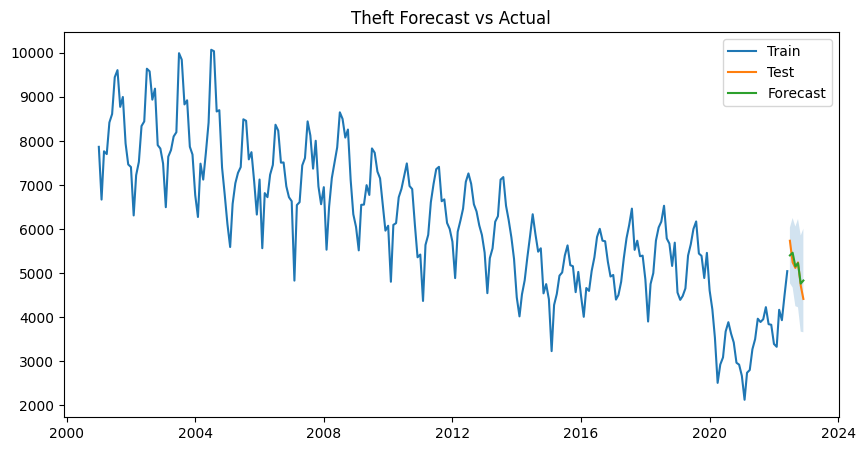

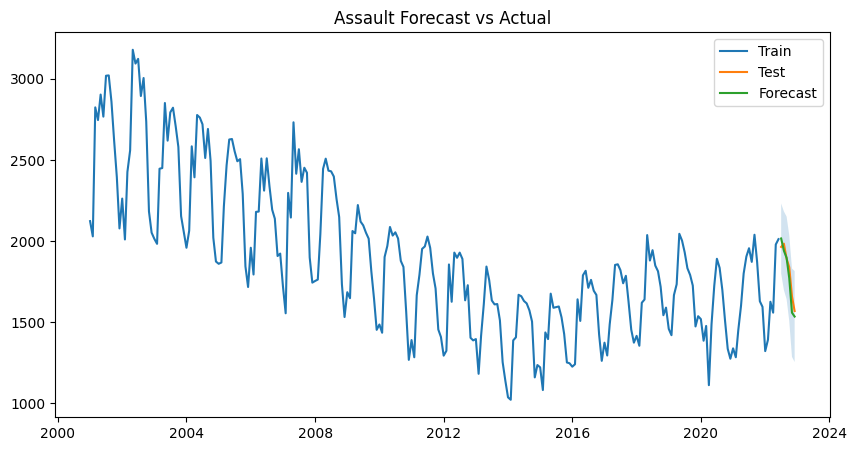

In [41]:
# Forecast next 6 months for Theft
forecast_theft = results_theft.get_forecast(steps=test_size)
pred_theft = forecast_theft.predicted_mean
conf_int_theft = forecast_theft.conf_int()

# Forecast next 6 months for Assault
forecast_assault = results_assault.get_forecast(steps=test_size)
pred_assault = forecast_assault.predicted_mean
conf_int_assault = forecast_assault.conf_int()

# Plot Theft
plt.figure(figsize=(10,5))
plt.plot(theft_train.index, theft_train, label='Train')
plt.plot(theft_test.index, theft_test, label='Test')
plt.plot(pred_theft.index, pred_theft, label='Forecast')
plt.fill_between(conf_int_theft.index, conf_int_theft.iloc[:,0], conf_int_theft.iloc[:,1], alpha=0.2)
plt.title('Theft Forecast vs Actual')
plt.legend()
plt.show()

# Plot Assault
plt.figure(figsize=(10,5))
plt.plot(assault_train.index, assault_train, label='Train')
plt.plot(assault_test.index, assault_test, label='Test')
plt.plot(pred_assault.index, pred_assault, label='Forecast')
plt.fill_between(conf_int_assault.index, conf_int_assault.iloc[:,0], conf_int_assault.iloc[:,1], alpha=0.2)
plt.title('Assault Forecast vs Actual')
plt.legend()
plt.show()

<a id='Step10'></a>
## 10. Use auto_arima for Tuning

In [42]:
!pip install numpy==1.26.4
!pip install pmdarima==2.0.4

In [43]:
from pmdarima import auto_arima

# Auto-tuning Theft
auto_model_theft = auto_arima(theft_train, seasonal=True, m=12, trace=True)
print(auto_model_theft.summary())

# Auto-tuning Assault
auto_model_assault = auto_arima(assault_train, seasonal=True, m=12, trace=True)
print(auto_model_assault.summary())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=8.00 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4050.524, Time=0.08 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3791.710, Time=4.75 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3914.631, Time=2.91 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4048.603, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4050.805, Time=0.10 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3774.214, Time=4.74 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3743.851, Time=16.69 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3743.960, Time=1.27 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.27 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3742.899, Time=7.75 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3870.719, Time=1.31 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3913.736, Time=0.43 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3754.859, Time=2.38 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=3745.681, Time=3.82 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=8.58 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=3742.925, Time=3.29 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.41 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[12]             : AIC=3741.268, Time=2.89 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[12]             : AIC=3868.767, Time=3.24 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12]             : AIC=3742.307, Time=2.43 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,2)[12]             : AIC=inf, Time=3.06 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12]             : AIC=3911.819, Time=0.35 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[12]             : AIC=inf, Time=2.64 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,2)[12]             : AIC=3753.387, Time=1.21 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,2)[12]             : AIC=inf, Time=4.29 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[12]             : AIC=inf, Time=7.14 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12]             : AIC=3741.264, Time=3.57 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12]             : AIC=3869.893, Time=1.24 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=3742.535, Time=0.71 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,2)[12]             : AIC=inf, Time=8.92 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12]             : AIC=3912.729, Time=0.88 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12]             : AIC=3742.319, Time=4.67 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[12]             : AIC=3743.232, Time=2.32 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,1,2)(1,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/arima.py", line 510, in _fit

 ARIMA(1,1,2)(1,0,2)[12]             : AIC=inf, Time=nan sec

Best model:  ARIMA(0,1,1)(1,0,2)[12]          
Total fit time: 126.976 seconds
                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  258
Model:             SARIMAX(0, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1865.632
Date:                                 Thu, 18 Sep 2025   AIC                           3741.264
Time:                                         18:54:06   BIC                           3759.009
Sample:                                     01-01-2001   HQIC                          3748.400
                                          - 06-01-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3318.021, Time=0.60 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3405.065, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3481.861, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3485.758, Time=0.05 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.76 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.35 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3404.125, Time=0.38 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.30 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=3337.645, Time=0.28 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=3313.233, Time=0.79 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=3462.086, Time=0.33 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=6.51 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=3212.885, Time=2.15 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=3402.032, Time=0.50 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=3207.943, Time=4.81 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=8.05 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=3204.268, Time=4.58 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,2)[12] intercept   : AIC=3367.296, Time=1.41 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=2.83 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,2)[12] intercept   : AIC=3197.763, Time=7.45 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,2)[12] intercept   : AIC=3368.056, Time=3.01 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,1)[12] intercept   : AIC=3206.078, Time=1.75 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,0,2)[12] intercept   : AIC=3196.117, Time=4.75 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,0,1)[12] intercept   : AIC=3202.667, Time=6.53 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(2,0,2)[12] intercept   : AIC=3192.115, Time=7.70 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,0,2)[12] intercept   : AIC=3192.523, Time=4.31 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(2,0,1)[12] intercept   : AIC=3195.971, Time=10.45 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,0,1)[12] intercept   : AIC=3201.533, Time=2.26 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(2,0,2)[12] intercept   : AIC=3193.745, Time=6.65 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(2,0,2)[12] intercept   : AIC=3202.001, Time=9.62 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,0,2)[12] intercept   : AIC=3266.326, Time=2.99 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=11.33 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(2,0,2)[12]             : AIC=inf, Time=5.62 sec

Best model:  ARIMA(4,1,0)(2,0,2)[12] intercept
Total fit time: 131.840 seconds
                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  258
Model:             SARIMAX(4, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1586.057
Date:                                 Thu, 18 Sep 2025   AIC                           3192.115
Time:                                         18:56:18   BIC                           3227.606
Sample:                                     01-01-2001   HQIC                          3206.388
                                          - 06-01-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------

<a id='Step11'></a>
## 11. Forecast with Tuned Model

In [51]:
# Refit with best parameters - Theft
model_theft_auto = SARIMAX(theft_train,
                           order=auto_model_theft.order,
                           seasonal_order=auto_model_theft.seasonal_order)
results_theft_auto = model_theft_auto.fit()
pred_theft_auto = results_theft_auto.get_forecast(steps=test_size).predicted_mean

# Refit - Assault
model_assault_auto = SARIMAX(assault_train,
                             order=auto_model_assault.order,
                             seasonal_order=auto_model_assault.seasonal_order)
results_assault_auto = model_assault_auto.fit()
pred_assault_auto = results_assault_auto.get_forecast(steps=test_size).predicted_mean

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<a id='Step12'></a>
## 12. Choose the Final Model

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) # Calculate RMSE by taking the square root
    return mae, rmse

# Evaluate
print("Manual Theft:", evaluate(theft_test, pred_theft))
print("Auto Theft:", evaluate(theft_test, pred_theft_auto))

print("Manual Assault:", evaluate(assault_test, pred_assault))
print("Auto Assault:", evaluate(assault_test, pred_assault_auto))

Manual Theft: (177.59673925479956, 236.85212556856303)
Auto Theft: (198.2571609094066, 261.574449380502)
Manual Assault: (50.40063579929298, 58.23854941506828)
Auto Assault: (45.749171356000524, 51.10638144192662)


<a id='Step13'></a>
## 13. Forecast Beyond the Data (Future)

In [54]:
# Forecast next 6 months (final forecast)
final_model_theft = SARIMAX(monthly_counts['theft'],
                            order=auto_model_theft.order,
                            seasonal_order=auto_model_theft.seasonal_order).fit()

final_model_assault = SARIMAX(monthly_counts['assault'],
                              order=auto_model_assault.order,
                              seasonal_order=auto_model_assault.seasonal_order).fit()

# Forecast
future_theft = final_model_theft.get_forecast(steps=6).predicted_mean
future_assault = final_model_assault.get_forecast(steps=6).predicted_mean

print("Future Theft Forecast:\n", future_theft)
print("\nFuture Assault Forecast:\n", future_assault)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Future Theft Forecast:
 2023-01-01    4037.795565
2023-02-01    3708.424261
2023-03-01    4219.691973
2023-04-01    4076.105508
2023-05-01    4589.175120
2023-06-01    4947.798788
Freq: MS, Name: predicted_mean, dtype: float64

Future Assault Forecast:
 2023-01-01    1549.907389
2023-02-01    1501.429552
2023-03-01    1705.095828
2023-04-01    1671.020656
2023-05-01    1971.473282
2023-06-01    2021.260562
Freq: MS, Name: predicted_mean, dtype: float64


<a id='Step14'></a>
## 14. Final Questions & Metrics

In [55]:
# Net and percent change
theft_delta = future_theft.iloc[-1] - future_theft.iloc[0]
assault_delta = future_assault.iloc[-1] - future_assault.iloc[0]

theft_percent = (theft_delta / future_theft.iloc[0]) * 100
assault_percent = (assault_delta / future_assault.iloc[0]) * 100

print("Theft - Net Change:", theft_delta, "| Percent Change:", theft_percent)
print("Assault - Net Change:", assault_delta, "| Percent Change:", assault_percent)

Theft - Net Change: 910.0032231407686 | Percent Change: 22.537129691436853
Assault - Net Change: 471.35317290089324 | Percent Change: 30.411699193449838


# Final Evaluation

Based on the provided analysis and results:

## Final Evaluation

1. **Which crime is forecasted to be most common at the end?**

   * **Theft** is forecasted to be most common at the end, with predicted values around 4000-4900, compared to Assault with values around 1500-2000.

2. **Which has the largest net change?**

   * **Theft** has the largest net change: 910.00
   * Assault net change: 471.35

3. **Which has the largest percent change?**

   * **Assault** has the largest percent change: 30.41%
   * Theft percent change: 22.54%

## Recommendation:

* **More resources should be allocated to Theft.**
  Even though Assault has a higher percentage increase, Theft has a higher absolute forecasted number of cases and a larger net change in incidents. This indicates Theft will remain the more prevalent crime and potentially puts more strain on resources. Prioritizing Theft prevention and response efforts will likely have a bigger overall impact.